# Booking Cancellation Analysis

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load the data from the Excel files for 2018, 2019, and 2020
data_2018 = pd.read_csv("C:/Users\kouti/OneDrive/Desktop/Dataset/booking-cancellation-dataset/2018.csv")
data_2019 = pd.read_csv("C:/Users/kouti/OneDrive/Desktop/Dataset/booking-cancellation-dataset/2019.csv")
data_2020 = pd.read_csv("C:/Users/kouti/OneDrive/Desktop/Dataset/booking-cancellation-dataset/2020.csv")

# Concatenate the data from the three years into one DataFrame
hotel_data = pd.concat([data_2018, data_2019, data_2020])

In [3]:
# Remove leading spaces from column names
data_2020.columns = data_2020.columns.str.strip()

In [4]:
# Concatenate the data from the three years into one DataFrame
hotel_data = pd.concat([data_2018, data_2019, data_2020])

In [5]:
hotel_data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               8
babies                                 0
meal                                   0
country                              625
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              19555
company         

In [6]:
for i in hotel_data.columns:
  if hotel_data[i].isna().sum() != 0:
    print('null values in', i, 'column :', hotel_data[i].isna().sum())

null values in children column : 8
null values in country column : 625
null values in agent column : 19555
null values in company column : 133822


In [7]:
hotel_data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,5/6/2018
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,4/22/2018
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.00,0,0,Canceled,6/23/2018
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.00,0,2,Canceled,5/11/2018
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.30,0,2,Canceled,5/29/2018
5,Resort Hotel,1,45,2018,July,27,2,1,3,3,...,No Deposit,241.0,NaN,0,Transient,108.80,0,1,Canceled,5/19/2018
6,Resort Hotel,1,40,2018,July,27,2,1,3,3,...,No Deposit,241.0,NaN,0,Transient,108.80,0,1,Canceled,6/19/2018
7,Resort Hotel,1,43,2018,July,27,2,1,3,3,...,No Deposit,241.0,NaN,0,Transient,108.80,0,0,Canceled,5/23/2018
8,Resort Hotel,1,45,2018,July,27,2,2,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,0,0,Canceled,5/18/2018
9,Resort Hotel,1,47,2018,July,27,2,2,5,2,...,No Deposit,240.0,NaN,0,Transient,153.00,0,0,Canceled,6/2/2018


In [8]:
hotel_data.shape

(141947, 32)

In [9]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141947 entries, 0 to 40686
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           141947 non-null  object 
 1   is_canceled                     141947 non-null  int64  
 2   lead_time                       141947 non-null  int64  
 3   arrival_date_year               141947 non-null  int64  
 4   arrival_date_month              141947 non-null  object 
 5   arrival_date_week_number        141947 non-null  int64  
 6   arrival_date_day_of_month       141947 non-null  int64  
 7   stays_in_weekend_nights         141947 non-null  int64  
 8   stays_in_week_nights            141947 non-null  int64  
 9   adults                          141947 non-null  int64  
 10  children                        141939 non-null  float64
 11  babies                          141947 non-null  int64  
 12  meal                  

In [10]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141939.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,122392.000000,8125.000000,141947.000000,141947.000000,141947.000000,141947.000000
mean,0.372245,102.821102,2019.131676,29.061058,15.748970,0.927557,2.495509,1.852551,0.097401,0.008285,0.031364,0.125413,0.120327,0.213939,85.685854,183.236062,2.305565,99.416916,0.062129,0.549677
std,0.483405,106.478569,0.651352,13.604758,8.737314,1.000817,1.909784,0.628553,0.388549,0.100520,0.174300,1.059631,1.381798,0.636479,109.628598,128.921950,16.938253,49.675549,0.244205,0.786541
min,0.000000,0.000000,2018.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,17.000000,2019.000000,18.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,51.000000,0.000000,65.750000,0.000000,0.000000
50%,0.000000,68.000000,2019.000000,30.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,174.000000,0.000000,90.950000,0.000000,0.000000
75%,1.000000,158.000000,2020.000000,40.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,269.000000,0.000000,123.000000,0.000000,1.000000
max,1.000000,737.000000,2020.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
from skimpy import skim

In [12]:
pip install skimpy

^C
Note: you may need to restart the kernel to use updated packages.


In [13]:
skim(hotel_data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 141947 │ │ int32       │ 16    │                                                          │
│ │ Number of columns │ 32     │ │ string      │ 12    │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 4     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA      ┃ NA %   ┃ mean    ┃ sd    ┃ p0    ┃ p25   ┃ p50  ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ is_canceled             │       0 │      0 │    0.37 │  0.48 │     0 │     0 │    0 │    1 │    1 │ ▇    ▅ │  │
│ │ lead_time               │       0 │      0 │     100 │   110 │     0 │    17 │   68 │  160 │  740 │  ▇▂▁   │  │
│ │ arrival_date_year       │       0 │      0 │    2000 │  0.65 │  2000 │  2000 │ 2000 │ 2000 │ 2000 │ ▂  ▇ ▅ │  │
│ │ arrival_date_week_numbe │       0 │      0 │      29 │    14 │     1 │    18 │   30 │   40 │   53 │ ▃▅▅▇▇▅ │  │
│ │ r                       │         │        │         │       │       │       │      │      │      │        │  │
│ │ arrival_date_day_of_mon │       0 │      0 │      16 │   8.7 │     1 │     8 │   16 │   23 │   31 │ ▇▇▇▇▇▇ │  │
│ │ th                      │         │        │         │       │       │       │      │      │      │        │  │
│ │ stays_in_weekend_nights │       0 │      0 │    0.93 │     1 │     0 │     0 │    1 │    2 │   19 │   ▇    │  │
│ │ stays_in_week_nights    │       0 │      0 │     2.5 │   1.9 │     0 │     1 │    2 │    3 │   50 │   ▇    │  │
│ │ adults                  │       0 │      0 │     1.9 │  0.63 │     0 │     2 │    2 │    2 │   55 │   ▇    │  │
│ │ children                │       8 │   0.01 │   0.097 │  0.39 │     0 │     0 │    0 │    0 │   10 │   ▇    │  │
│ │ babies                  │       0 │      0 │  0.0083 │   0.1 │     0 │     0 │    0 │    0 │   10 │   ▇    │  │
│ │ is_repeated_guest       │       0 │      0 │   0.031 │  0.17 │     0 │     0 │    0 │    0 │    1 │   ▇    │  │
│ │ previous_cancellations  │       0 │      0 │    0.13 │   1.1 │     0 │     0 │    0 │    0 │   26 │   ▇    │  │
│ │ previous_bookings_not_c │       0 │      0 │    0.12 │   1.4 │     0 │     0 │    0 │    0 │   72 │   ▇    │  │
│ │ anceled                 │         │        │         │       │       │       │      │      │      │        │  │
│ │ booking_changes         │       0 │      0 │    0.21 │  0.64 │     0 │     0 │    0 │    0 │   21 │   ▇    │  │
│ │ agent                   │   19555 │  13.78 │      86 │   110 │     1 │     9 │   14 │  230 │  540 │  ▇▁▃   │  │
│ │ company                 │  133822 │  94.28 │     180 │   130 │     6 │    51 │  170 │  270 │  540 │ ▇▃▅▃▂▁ │  │
│ │ days_in_waiting_list    │       0 │      0 │     2.3 │    17 │     0 │     0 │    0 │    0 │  390 │   ▇    │  │
│ │ adr                     │       0 │      0 │      99 │    50 │  -6.4 │    66 │   91 │  120 │ 5400 │   ▇    │  │
│ │ required_car_parking_sp │       0 │      0 │   0.062

In [14]:
hotel_data = hotel_data.dropna(subset=['children'])

In [15]:
mode_country = hotel_data['country'].mode()[0]
hotel_data['country'].fillna(mode_country, inplace=True)

In [16]:
hotel_data = hotel_data.drop(columns=['company'])

In [17]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,5/6/2018
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,0,No Deposit,15.0,0,Transient,105.5,0,0,Canceled,4/22/2018
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,0,No Deposit,240.0,0,Transient,123.0,0,0,Canceled,6/23/2018
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,0,No Deposit,240.0,0,Transient,107.0,0,2,Canceled,5/11/2018
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,0,No Deposit,NaN,0,Transient,108.3,0,2,Canceled,5/29/2018


In [18]:
hotel_data['agent'].fillna(9, inplace=True)

In [19]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,5/6/2018
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,0,No Deposit,15.0,0,Transient,105.5,0,0,Canceled,4/22/2018
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,0,No Deposit,240.0,0,Transient,123.0,0,0,Canceled,6/23/2018
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,0,No Deposit,240.0,0,Transient,107.0,0,2,Canceled,5/11/2018
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,0,No Deposit,9.0,0,Transient,108.3,0,2,Canceled,5/29/2018


In [20]:
market_segment_data = pd.read_csv("C:/Users/kouti/OneDrive/Desktop/Dataset/booking-cancellation-dataset/market_segment.csv")
meal_cost_data = pd.read_csv("C:/Users/kouti/OneDrive/Desktop/Dataset/booking-cancellation-dataset/meal_cost.csv")

In [21]:
meal_cost_data['Cost']

0     0.00
1    12.99
2    17.99
3    21.99
4    35.00
Name: Cost, dtype: float64

In [22]:
meal_cost_data

,Cost,meal
0,0.00,Undefined
1,12.99,BB
2,17.99,HB
3,21.99,FB
4,35.00,SC


In [23]:
meal_cost_data['Cost'] = meal_cost_data['Cost'].astype(str).str.strip()


In [24]:
meal_cost_data

,Cost,meal
0,0.0,Undefined
1,12.99,BB
2,17.99,HB
3,21.99,FB
4,35.0,SC


In [25]:
# Remove white spaces and convert to the same data type
hotel_data['market_segment'] = hotel_data['market_segment'].str.strip()
meal_cost_data['meal'] = meal_cost_data['meal'].str.strip()
meal_cost_data['Cost'] = meal_cost_data['Cost'].str.strip()

# Make sure the 'Cost' column is numeric (assuming it should be numeric)
meal_cost_data['Cost'] = pd.to_numeric(meal_cost_data['Cost'], errors='coerce')
 # 'coerce' will handle any non-numeric values

# Merge the DataFrames as you have done
hotel_data = pd.merge(hotel_data, market_segment_data, on='market_segment', how='left')
hotel_data = pd.merge(hotel_data, meal_cost_data, on='meal', how='left')

In [26]:
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Discount,Cost
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,240.0,0,Transient,82.0,0,1,Canceled,5/6/2018,0.30,12.99
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,15.0,0,Transient,105.5,0,0,Canceled,4/22/2018,0.30,17.99
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,240.0,0,Transient,123.0,0,0,Canceled,6/23/2018,0.30,12.99
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,240.0,0,Transient,107.0,0,2,Canceled,5/11/2018,0.30,12.99
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,9.0,0,Transient,108.3,0,2,Canceled,5/29/2018,0.10,12.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141934,City Hotel,1,1,2020,February,5,1,0,0,1,...,9.0,0,Transient,0.0,0,1,No-Show,2/1/2020,0.20,12.99
141935,City Hotel,1,31,2020,July,29,16,2,0,1,...,9.0,0,Transient,135.0,0,2,No-Show,7/16/2020,0.10,12.99
141936,City Hotel,1,25,2020,May,18,6,2,1,1,...,9.0,0,Transient,125.0,0,0,No-Show,5/6/2020,0.15,12.99
141937,City Hotel,1,6,2020,July,29,17,1,0,1,...,9.0,0,Transient,65.0,0,0,No-Show,7/17/2020,0.15,12.99


In [27]:
market_segment_data

,Discount,market_segment
0,0.00,Undefined
1,0.10,Direct
2,0.10,Groups
3,0.15,Corporate
4,0.20,Aviation
5,0.30,Offline TA/TO
6,0.30,Online TA
7,1.00,Complementary


In [30]:
hotel_data['market_segment']

0             Online TA
1         Offline TA/TO
2             Online TA
3             Online TA
4                Direct
              ...      
141934         Aviation
141935           Direct
141936        Corporate
141937        Corporate
141938        Corporate
Name: market_segment, Length: 141939, dtype: object

In [31]:
hotel_data['reservation_status_date'] = pd.to_datetime(hotel_data['reservation_status_date'])
discrepancies = hotel_data[hotel_data['reservation_status_date'].dt.year != hotel_data['arrival_date_year']]

In [32]:
discrepancies

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Discount,Cost
566,Resort Hotel,1,297,2018,September,36,3,1,3,2,...,240.0,0,Transient,0.00,0,0,Canceled,2014-11-18,0.1,12.99
4211,City Hotel,1,265,2018,July,28,9,0,2,2,...,1.0,0,Transient-Party,62.80,0,0,Canceled,2014-10-17,0.1,12.99
4212,City Hotel,1,258,2018,July,27,2,0,2,2,...,1.0,0,Transient-Party,62.80,0,0,Canceled,2014-10-17,0.1,12.99
4213,City Hotel,1,258,2018,July,27,2,0,2,2,...,1.0,0,Transient-Party,62.80,0,0,Canceled,2014-10-17,0.1,12.99
4214,City Hotel,1,258,2018,July,27,2,0,2,2,...,1.0,0,Transient-Party,62.80,0,0,Canceled,2014-10-17,0.1,12.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116412,City Hotel,1,301,2020,August,34,24,1,3,2,...,9.0,0,Transient,116.10,0,2,Canceled,2019-12-02,0.3,12.99
116518,City Hotel,1,279,2020,August,35,28,1,1,2,...,9.0,0,Transient,107.10,0,0,Canceled,2019-12-29,0.3,12.99
116533,City Hotel,1,321,2020,August,35,28,1,4,2,...,9.0,0,Transient,145.08,0,3,Canceled,2019-12-24,0.3,17.99
116613,City Hotel,1,52,2020,January,1,6,2,2,2,...,9.0,0,Transient,88.40,0,2,Canceled,2019-12-22,0.3,12.99


In [33]:
expected_years = [2018, 2019, 2020]

# Filter rows with abnormal discrepancies and keep only those with expected years
hotel_data = hotel_data[hotel_data['reservation_status_date'].dt.year.isin(expected_years)]

In [34]:
hotel_data.duplicated().sum()

40883

In [35]:
hotel_data = hotel_data.drop_duplicates()

In [36]:
hotel_data


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Discount,Cost
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,240.0,0,Transient,82.0,0,1,Canceled,2018-05-06,0.30,12.99
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,15.0,0,Transient,105.5,0,0,Canceled,2018-04-22,0.30,17.99
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,240.0,0,Transient,123.0,0,0,Canceled,2018-06-23,0.30,12.99
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,240.0,0,Transient,107.0,0,2,Canceled,2018-05-11,0.30,12.99
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,9.0,0,Transient,108.3,0,2,Canceled,2018-05-29,0.10,12.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141934,City Hotel,1,1,2020,February,5,1,0,0,1,...,9.0,0,Transient,0.0,0,1,No-Show,2020-02-01,0.20,12.99
141935,City Hotel,1,31,2020,July,29,16,2,0,1,...,9.0,0,Transient,135.0,0,2,No-Show,2020-07-16,0.10,12.99
141936,City Hotel,1,25,2020,May,18,6,2,1,1,...,9.0,0,Transient,125.0,0,0,No-Show,2020-05-06,0.15,12.99
141937,City Hotel,1,6,2020,July,29,17,1,0,1,...,9.0,0,Transient,65.0,0,0,No-Show,2020-07-17,0.15,12.99


## EDA

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
# Group the data by year and month and calculate the monthly cancellation rates
monthly_cancelation_rates = hotel_data.groupby(['arrival_date_year', 'arrival_date_month'])['is_canceled'].mean().reset_index()

# Sort the data by year and month for proper plotting
monthly_cancelation_rates = monthly_cancelation_rates.sort_values(by=['arrival_date_year', 'arrival_date_month'])

In [80]:
import sort_dataframeby_monthorweek as sd


In [81]:
def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [82]:
monthly_cancelation_rates = sort_month(monthly_cancelation_rates, 'arrival_date_month')

In [83]:
monthly_cancelation_rates

,arrival_date_year,arrival_date_month,is_canceled
0,2019,January,0.162791
1,2020,January,0.259324
2,2019,February,0.199084
3,2020,February,0.269605
4,2019,March,0.233333
5,2020,March,0.256522
6,2019,April,0.269037
7,2020,April,0.337122
8,2019,May,0.248942
9,2020,May,0.328159


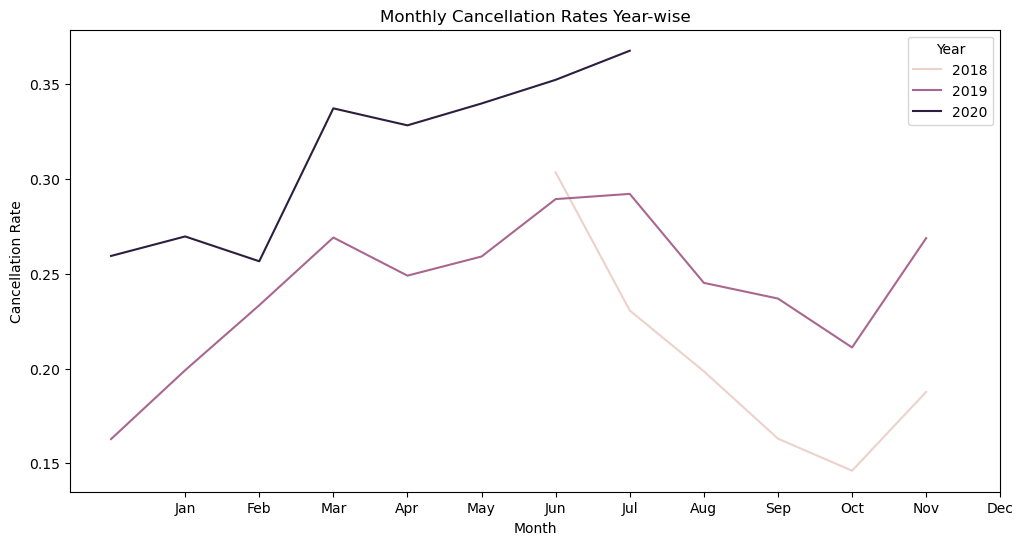

In [84]:
# Create a time series plot for each year
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_cancelation_rates, x='arrival_date_month', y='is_canceled', hue='arrival_date_year')
plt.title('Monthly Cancellation Rates Year-wise')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()

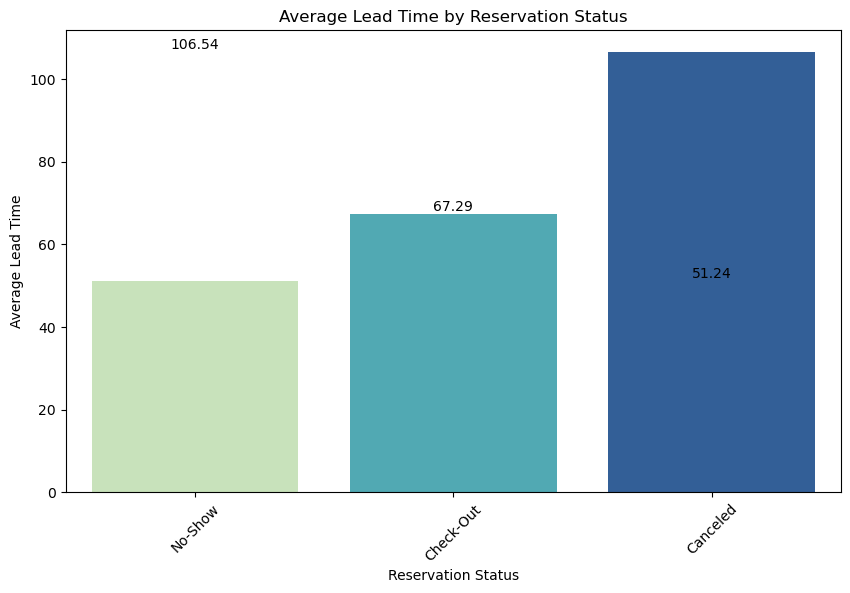

In [85]:
# Group the data by reservation status and calculate the average lead time
reservation_lead_time = hotel_data.groupby('reservation_status')['lead_time'].mean().reset_index()

# Sort the data for plotting
reservation_lead_time = reservation_lead_time.sort_values(by='lead_time')

# Create a bar plot with labels
plt.figure(figsize=(10, 6))
sns.barplot(data=reservation_lead_time, x='reservation_status', y='lead_time', palette='YlGnBu')
plt.title('Average Lead Time by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Average Lead Time')

# Add data labels to the bars
for index, row in reservation_lead_time.iterrows():
    plt.text(index, row['lead_time'], f'{row["lead_time"]:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

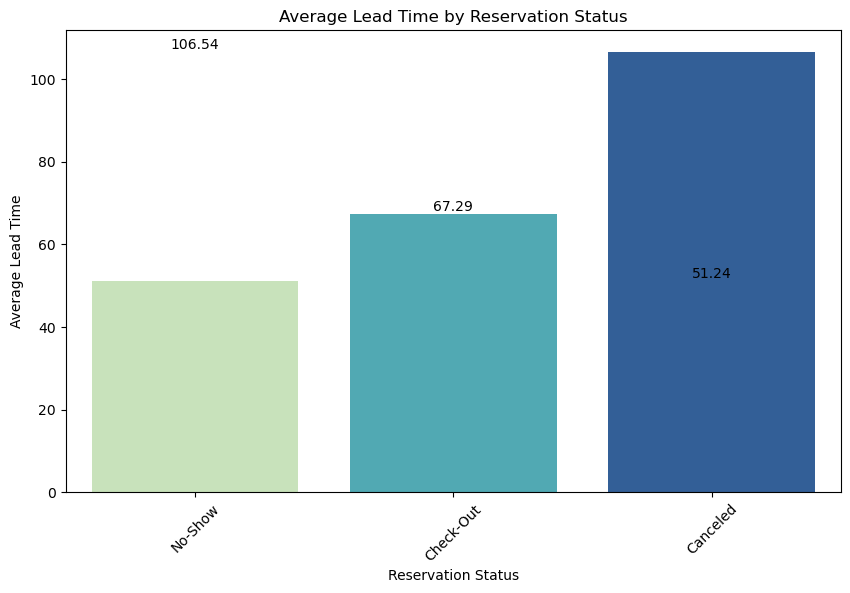

In [86]:
# Group the data by reservation status and calculate the average lead time
reservation_lead_time = hotel_data.groupby('reservation_status')['lead_time'].mean().reset_index()

# Sort the data for plotting
reservation_lead_time = reservation_lead_time.sort_values(by='lead_time')

# Create a bar plot with labels
plt.figure(figsize=(10, 6))
sns.barplot(data=reservation_lead_time, x='reservation_status', y='lead_time', palette='YlGnBu')
plt.title('Average Lead Time by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Average Lead Time')

# Add data labels to the bars
for index, row in reservation_lead_time.iterrows():
    plt.text(index, row['lead_time'], f'{row["lead_time"]:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

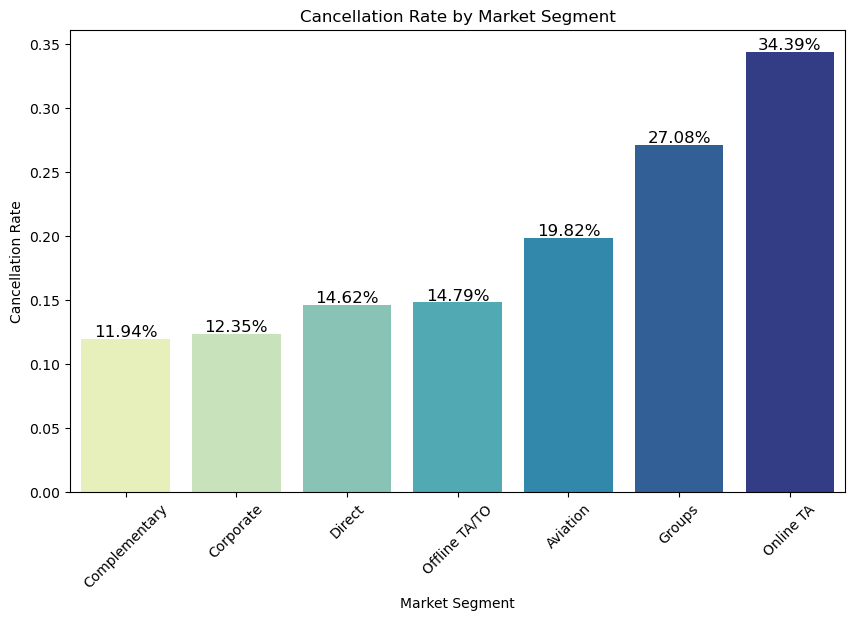

In [87]:
# Group the data by market segment and calculate the cancellation rate
market_segment_cancellation_rate = hotel_data.groupby('market_segment')['is_canceled'].mean().reset_index()

# Sort the data for plotting
market_segment_cancellation_rate = market_segment_cancellation_rate.sort_values(by='is_canceled')

# Create a bar plot for market segment cancellation rates with 'YlGnBu' color palette
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=market_segment_cancellation_rate, x='market_segment', y='is_canceled', palette='YlGnBu')

# Add data labels to the chart
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()



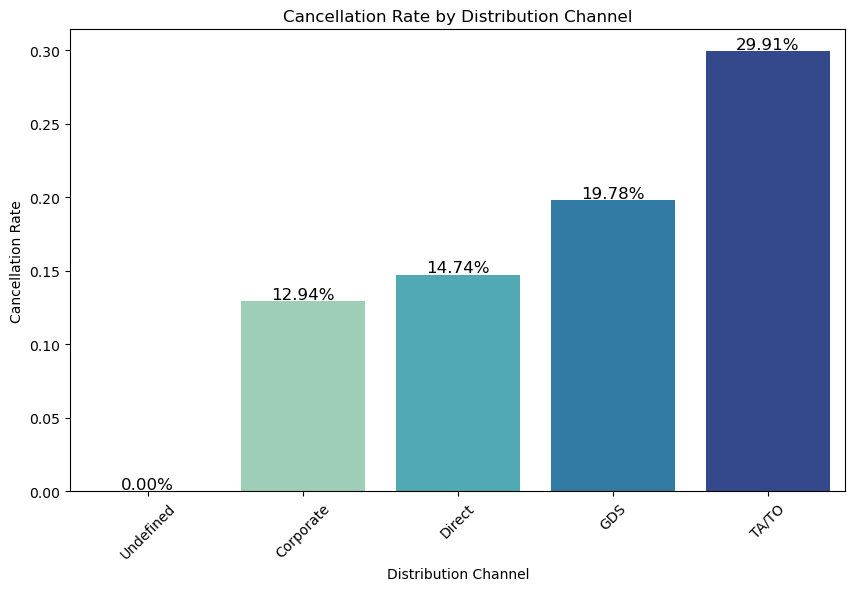

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by distribution channel and calculate the cancellation rate
distribution_channel_cancellation_rate = hotel_data.groupby('distribution_channel')['is_canceled'].mean().reset_index()

# Sort the data for plotting
distribution_channel_cancellation_rate = distribution_channel_cancellation_rate.sort_values(by='is_canceled')

# Create a bar plot for distribution channel cancellation rates
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=distribution_channel_cancellation_rate, x='distribution_channel', y='is_canceled', palette='YlGnBu')

# Add data labels to the chart
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Cancellation Rate by Distribution Channel')
plt.xlabel('Distribution Channel')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()



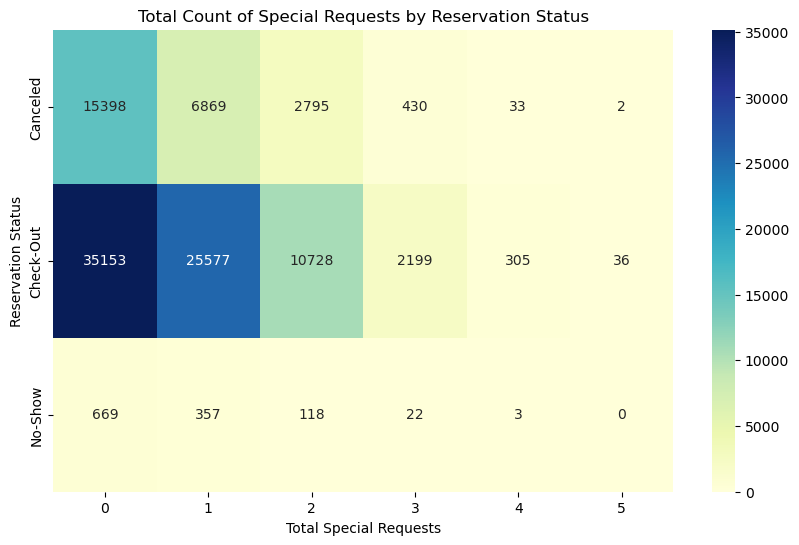

In [89]:
# Create a pivot table with 'reservation_status' and 'total_of_special_requests' as indices
pivot_table = hotel_data.pivot_table(index='reservation_status', columns='total_of_special_requests', aggfunc='size', fill_value=0)

# Create a heatmap using a color scheme
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Total Count of Special Requests by Reservation Status')
plt.xlabel('Total Special Requests')
plt.ylabel('Reservation Status')
plt.show()


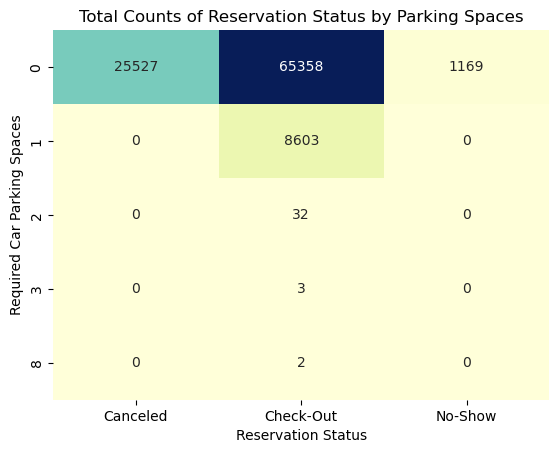

In [90]:
# Assuming 'hotel_data' is your DataFrame
pivot_table = hotel_data.pivot_table(index='required_car_parking_spaces', columns='reservation_status', values='adr', aggfunc='count', fill_value=0)

# Create a heatmap with a color scheme
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar=False)

plt.title('Total Counts of Reservation Status by Parking Spaces')
plt.xlabel('Reservation Status')
plt.ylabel('Required Car Parking Spaces')

plt.show()


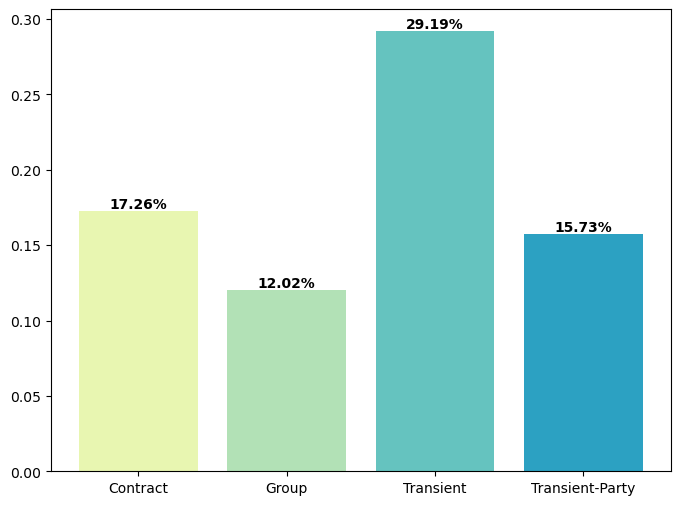

In [91]:
# Group the data by customer type and calculate cancellation rates
customer_type_cancellation = hotel_data.groupby('customer_type')['is_canceled'].mean().reset_index()

# Create a bar plot with 'YlGnBu' color palette and data labels
plt.figure(figsize=(8, 6))
bars = plt.bar(customer_type_cancellation['customer_type'], customer_type_cancellation['is_canceled'], color=sns.color_palette('YlGnBu'))

# Add data labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom', fontsize=10, fontweight='bold')


# Show the plot
plt.show()


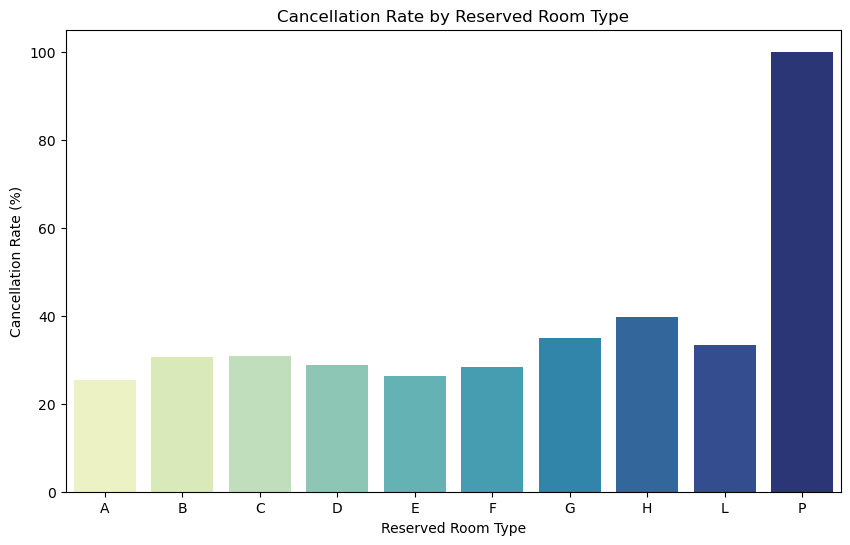

In [92]:
# Calculate the cancellation rate for each room type
cancellation_rate_by_room_type = hotel_data.groupby('reserved_room_type')['is_canceled'].mean() * 100

# Create a bar chart with the 'YlGnBu' color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=cancellation_rate_by_room_type.index, y=cancellation_rate_by_room_type.values, palette='YlGnBu')
plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Reserved Room Type')
plt.title('Cancellation Rate by Reserved Room Type')
plt.xticks(rotation=0)
plt.show()


In [93]:
hotel_data['reserved_room_type']

0         A
1         D
2         E
3         E
4         E
         ..
141934    A
141935    A
141936    E
141937    A
141938    A
Name: reserved_room_type, Length: 100694, dtype: object

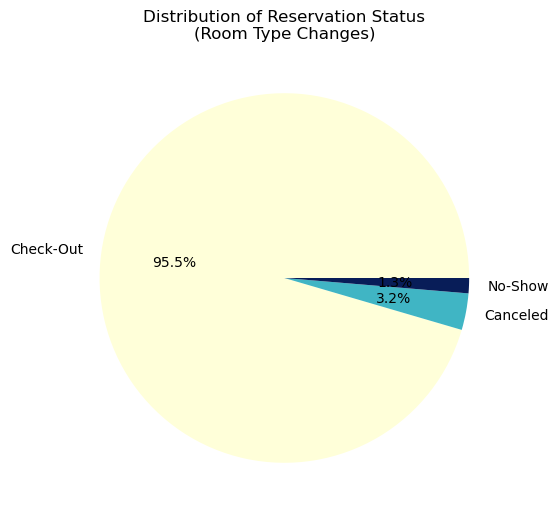

In [94]:
# Filter rows where 'reserved_room_type' and 'assigned_room_type' are not similar
room_type_changes = hotel_data[hotel_data['reserved_room_type'] != hotel_data['assigned_room_type']]

# Count occurrences of each 'reservation_status' when 'reserved_room_type' and 'assigned_room_type' are not similar
reservation_status_counts = room_type_changes['reservation_status'].value_counts(normalize=True)

# Define the 'YlGnBu' color palette
colors = plt.cm.YlGnBu(np.linspace(0, 1, len(reservation_status_counts)))

# Create a pie chart with 'YlGnBu' color palette
plt.figure(figsize=(8, 6))
plt.pie(reservation_status_counts, labels=reservation_status_counts.index, autopct=lambda p: f'{p:.1f}%', colors=colors)
plt.title("Distribution of Reservation Status\n(Room Type Changes)")
plt.show()

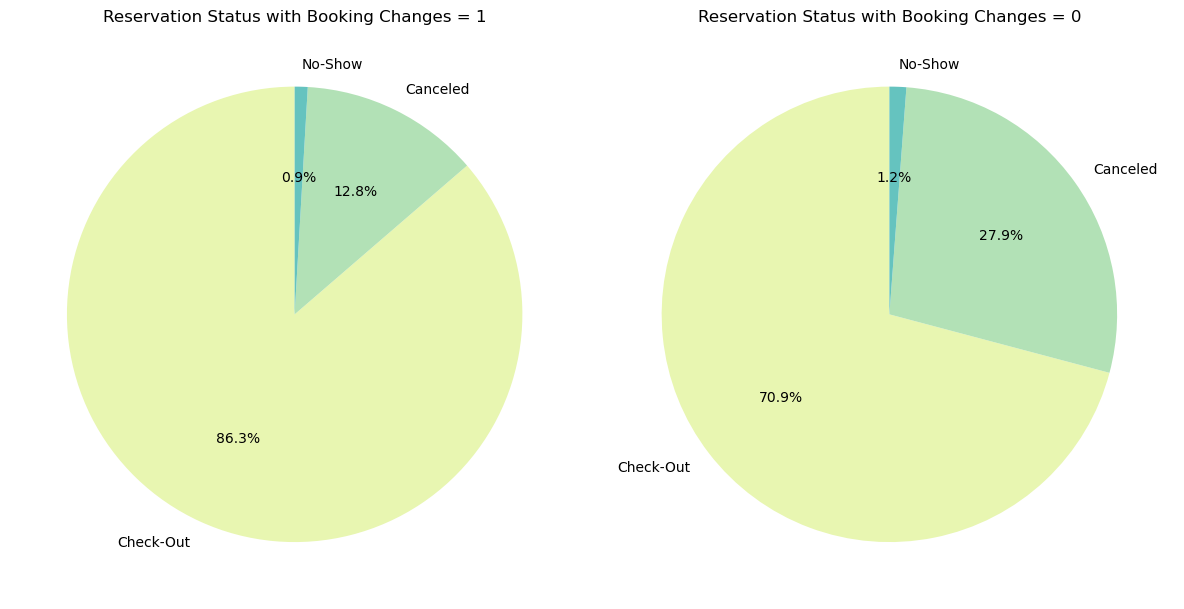

In [95]:
# Filter rows where 'booking_changes' is 1 or 0
booking_changes_1 = hotel_data[hotel_data['booking_changes'] == 1]
booking_changes_0 = hotel_data[hotel_data['booking_changes'] == 0]

# Calculate percentage total for each 'reservation_status' in each group
total_1 = len(booking_changes_1)
total_0 = len(booking_changes_0)

reservation_status_counts_1 = booking_changes_1['reservation_status'].value_counts() / total_1 * 100
reservation_status_counts_0 = booking_changes_0['reservation_status'].value_counts() / total_0 * 100

# Create two pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for 'Booking Changes = 1'
ax1.pie(reservation_status_counts_1, labels=reservation_status_counts_1.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('YlGnBu'))
ax1.set_title('Reservation Status with Booking Changes = 1')

# Pie chart for 'Booking Changes = 0'
ax2.pie(reservation_status_counts_0, labels=reservation_status_counts_0.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('YlGnBu'))
ax2.set_title('Reservation Status with Booking Changes = 0')

plt.tight_layout()
plt.show()

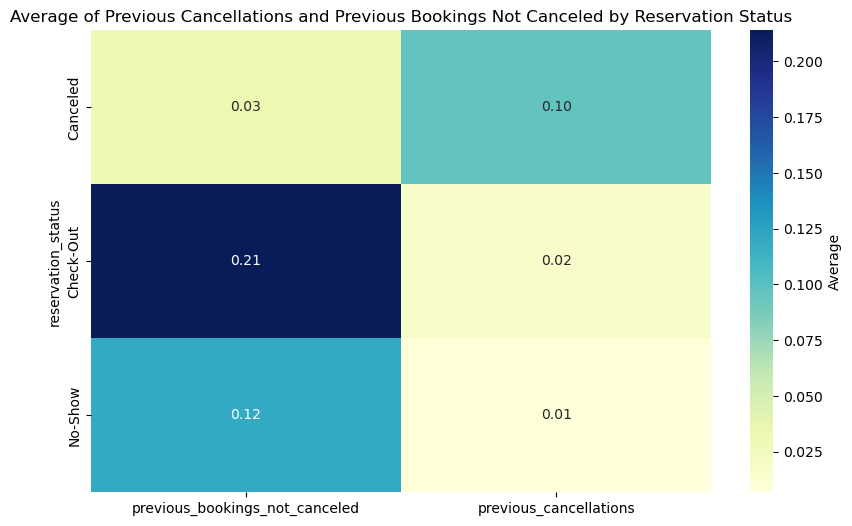

In [96]:
# Create a pivot table with 'reservation_status' as the index and the average of 'previous_cancellations' and 'previous_bookings_not_canceled' as values
pivot_table = hotel_data.pivot_table(index='reservation_status', values=['previous_cancellations', 'previous_bookings_not_canceled'], aggfunc='mean')

# Create a heatmap of the pivot table
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Average'}, fmt='.2f')
plt.title('Average of Previous Cancellations and Previous Bookings Not Canceled by Reservation Status')
plt.show()


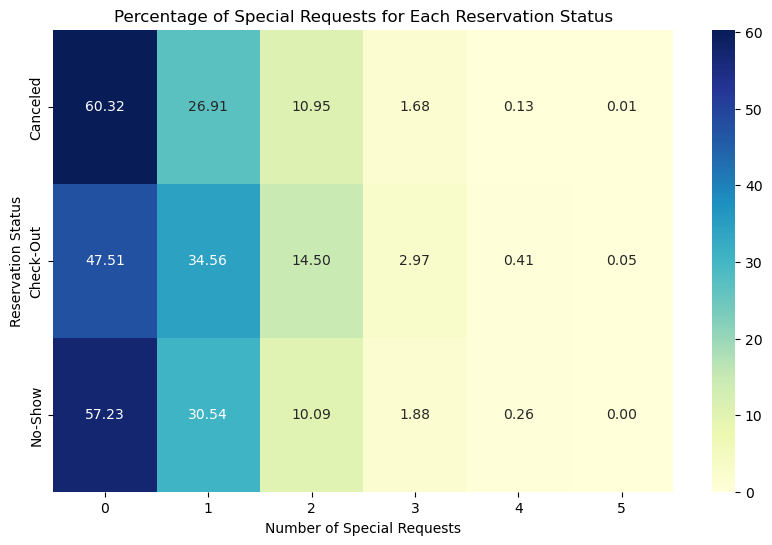

In [97]:
# Filter data for reservation statuses 'Canceled', 'No-Show', and 'Check-Out'
selected_reservation_statuses = ['Canceled', 'No-Show', 'Check-Out']
filtered_data = hotel_data[hotel_data['reservation_status'].isin(selected_reservation_statuses)]

# Create a pivot table to calculate the percentage of each number of special requests for each reservation status
pivot_table = pd.pivot_table(filtered_data, values='adr', index='reservation_status', columns='total_of_special_requests', aggfunc='count', fill_value=0)
pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Create a heatmap to visualize the results
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Percentage of Special Requests for Each Reservation Status')
plt.ylabel('Reservation Status')
plt.xlabel('Number of Special Requests')
plt.show()


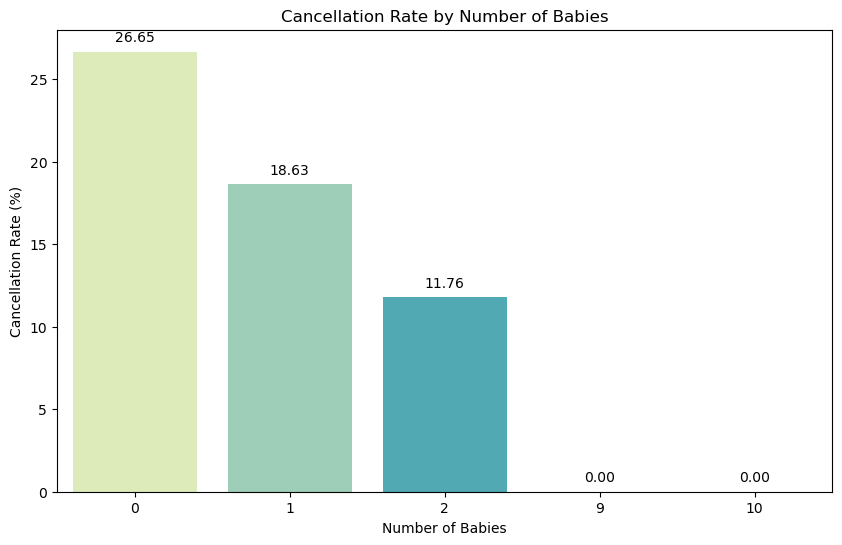

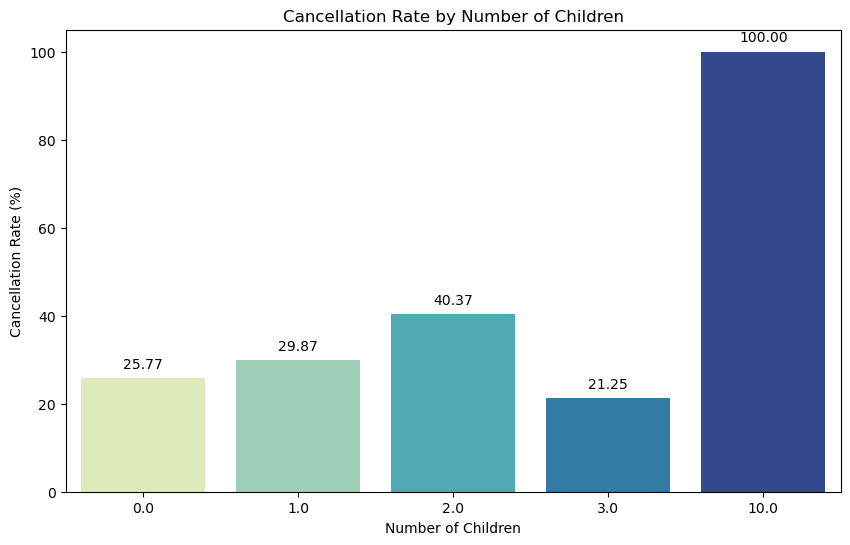

In [98]:
# Calculate the cancellation rate for each value in 'babies'
cancellation_rate_babies = hotel_data.groupby('babies')['is_canceled'].mean() * 100

# Create a bar chart with the 'YlGnBu' color palette and data labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cancellation_rate_babies.index, y=cancellation_rate_babies, palette='YlGnBu')

plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Number of Babies')
plt.title('Cancellation Rate by Number of Babies')
plt.xticks(rotation=0)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

# Calculate the cancellation rate for each value in 'children'
cancellation_rate_children = hotel_data.groupby('children')['is_canceled'].mean() * 100

# Create a bar chart with the 'YlGnBu' color palette and data labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cancellation_rate_children.index, y=cancellation_rate_children, palette='YlGnBu')

plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Number of Children')
plt.title('Cancellation Rate by Number of Children')
plt.xticks(rotation=0)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [99]:
guest_city = hotel_data[hotel_data['is_canceled'] == 0]['country'].value_counts().reset_index()
guest_city.columns = ['Country', 'No of guests']
guest_city

,Country,No of guests
0,PRT,22300
1,GBR,9553
2,FRA,8066
3,ESP,6713
4,DEU,4702
...,...,...
160,BHR,1
161,MLI,1
162,BFA,1
163,BDI,1


In [101]:
import folium
from folium.plugins import HeatMap
import plotly.express as px
basemap = folium.Map()
guests_map = px.choropleth(guest_city, locations = guest_city['Country'],
                           color = guest_city['No of guests'], hover_name = guest_city['Country'])
guests_map.show()

Most guests are from Portugal and other countries in Europe.

In [102]:
hotel_data.to_csv('cleaned-data.csv')